In [1]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random
from matplotlib import colors
import copy
import time
import scipy.optimize
import datetime

%matplotlib inline

In [34]:
def spec_heat_ps(energy_list, T, N):
    """Compute the specific heat per spin for an input list of energy values at temperature T and lattice sites N"""
    
    if type(energy_list) is list:
        energy_list = np.array(energy_list)
    
    c = (1/(T**2 * N)) * np.var(energy_list)
    
    return c

def sus(mag_list, T, N):
    """Compute susceptibility for an input list of magnetization values at temperature T and lattice sites N"""
    
    if type(mag_list) is list:
        mag_list = np.array(mag_list)
    
    chi = (1/(T*N)) * np.var(mag_list)
    
    return chi

def bootstrap_mean(values, n):
    """Uses the bootstrap method to compute the error in the mean of a given list of values"""
    
    ns = len(values)
    
    means = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(values, ns)
        means[i] = np.mean(samples)
    
    error = np.std(means)
    
    return error
    
    
    
    
def bootstrap_c(energies, T, N, n):
    """Uses bootstrap to compute the error in the specific heat for an input set of energies"""
    
    ns = len(energies)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(energies, ns)
        values[i] = spec_heat_ps(samples, T, N)
        
    error = np.std(values)
    
    return error





def bootstrap_s(magps, T, N, n):
    """Uses bootstrap to compute the error in the susceptibility for an input set of magnetization"""
    
    ns = len(magps)
    
    values = np.zeros(n)
    
    for i in range(n):
        samples = np.random.choice(magps, ns)
        values[i] = sus(samples, T, N)
    
    error = np.std(values)
    
    return error
        

In [15]:
def power(x, a, b, c):
    return a*((b-x)/b)**c

In [74]:
def powerpos(x, a, b, c):
    return a*((x-b)/b)**c

In [4]:
enepsv1 = np.load('Potts_eneps25v1.npy')
spec_heatv1 = np.load('Potts_spec_heat25v1.npy')
magpsv1 = np.load('Potts_magps25v1.npy')
mag_susv1 = np.load('Potts_magsus25v1.npy')
ene_dictv1 = np.load('Potts_ene_dict25.npy')[()]
mag_dictv1 = np.load('Potts_mag_dict25.npy')[()]

# Computing Error

In [35]:
keys = list(mag_dictv1.keys())

In [37]:
mag_errors = []

for k in keys:
    mag_errors.append(bootstrap_mean(mag_dictv1[k], 1000))
    
mag_errors = np.array(mag_errors)/625

In [39]:
mtest_error = np.delete(mag_errors, 48)

In [40]:
sus_errors = []

for k in keys:
    sus_errors.append(bootstrap_s(mag_dictv1[k], float(k), 625, 1000))

In [41]:
sh_errors = []

for k in keys:
    sh_errors.append(bootstrap_c(ene_dictv1[k], float(k), 625, 1000))

# Computing Exponents

## Magnetization

In [10]:
temps = [i for i in np.arange(0.5, 1.51, 0.01)]

In [25]:
mag_test = np.delete(magpsv1, 48)
temp_test = np.delete(temps, 48)

Text(0,0.5,'Magnetization')

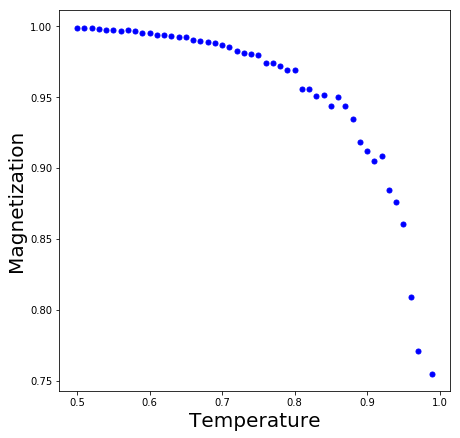

In [51]:
plt.figure(figsize=(7,7)) 
plt.plot(temp_test[:49], mag_test[:49], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Magnetization", fontsize=20)

In [50]:
scipy.optimize.curve_fit(power, temp_test[35:49], mag_test[35:49], p0 = [1, 1.1, 0.1], sigma = mtest_error[35:49], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([1.14169925, 1.00177867, 0.09625896]),
 array([[8.72655753e-04, 1.82730864e-04, 4.15030063e-04],
        [1.82730864e-04, 6.05419669e-05, 9.61250118e-05],
        [4.15030063e-04, 9.61250118e-05, 2.02415923e-04]]))

In [56]:
scipy.optimize.curve_fit(power, temp_test[39:49], mag_test[39:49], p0 = [1, 1.1, 0.1], sigma = mtest_error[39:49], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([1.14703244, 1.00305732, 0.0991277 ]),
 array([[0.00434894, 0.00065461, 0.00182483],
        [0.00065461, 0.00013336, 0.00029268],
        [0.00182483, 0.00029268, 0.00077754]]))

## Susceptibility

Text(0,0.5,'Susceptibility')

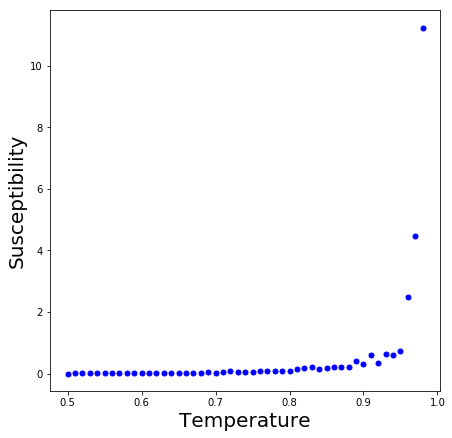

In [63]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[:49], mag_susv1[:49], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)

In [64]:
scipy.optimize.curve_fit(power, temps[40:49], mag_susv1[40:49], p0 = [1, 1, 1.4], sigma = sus_errors[40:49], maxfev=10000)

(array([ 0.00355529,  0.99044928, -1.78405376]),
 array([[ 2.82077205e-05, -3.91851118e-05,  3.12324205e-03],
        [-3.91851118e-05,  6.20477840e-05, -4.49862622e-03],
        [ 3.12324205e-03, -4.49862622e-03,  3.50166585e-01]]))

In [70]:
scipy.optimize.curve_fit(power, temps[39:49], mag_susv1[39:49], p0 = [1, 1, 1.4], sigma = sus_errors[39:49], maxfev=10000)

(array([ 0.00592789,  0.98842924, -1.59736655]),
 array([[ 5.65857331e-05, -4.44766007e-05,  3.66887310e-03],
        [-4.44766007e-05,  4.06333308e-05, -3.00330645e-03],
        [ 3.66887310e-03, -3.00330645e-03,  2.41363844e-01]]))

Text(0,0.5,'Susceptibility')

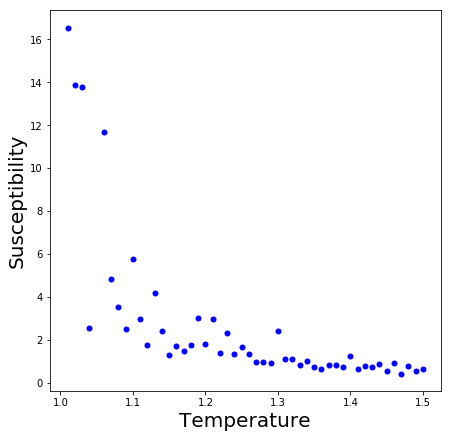

In [83]:
plt.figure(figsize=(7,7)) 
plt.plot(sus_temp[51:], sus_test[51:], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)

In [91]:
scipy.optimize.curve_fit(powerpos, sus_temp[51:60], sus_test[51:60], p0 = [1, 1, 1.4], sigma = sus_errtest[51:60], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.58009284,  1.00412293, -0.66132219]),
 array([[1.36328269e+00, 1.83980383e-02, 8.48854098e-01],
        [1.83980383e-02, 3.00620902e-04, 1.21560507e-02],
        [8.48854098e-01, 1.21560507e-02, 5.41266488e-01]]))

In [80]:
sus_test = np.delete(mag_susv1,55)
sus_temp = np.delete(temps,55)
sus_errtest = np.delete(sus_errors,55)

## Specific Heat

Text(0,0.5,'Susceptibility')

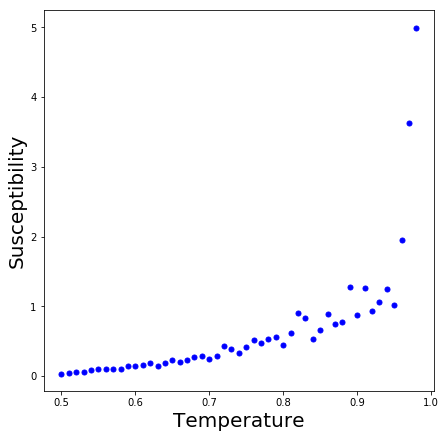

In [94]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[:49], spec_heatv1[:49], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)

In [104]:
scipy.optimize.curve_fit(power, temps[36:48], spec_heatv1[36:48], p0 = [1, 1, 0.35], sigma = sh_errors[36:48], maxfev=10000)

(array([ 0.43102225,  0.9706207 , -0.29001973]),
 array([[ 1.44000163e-02, -9.75699299e-05,  1.06664655e-02],
        [-9.75699299e-05,  8.74994686e-07, -7.83142261e-05],
        [ 1.06664655e-02, -7.83142261e-05,  8.26250330e-03]]))

In [105]:
scipy.optimize.curve_fit(power, temps[38:48], spec_heatv1[38:48], p0 = [1, 1, 0.35], sigma = sh_errors[38:48], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.4381623 ,  0.97058628, -0.28555936]),
 array([[ 2.53219396e-02, -1.54802110e-04,  1.78691535e-02],
        [-1.54802110e-04,  1.19668288e-06, -1.16850142e-04],
        [ 1.78691535e-02, -1.16850142e-04,  1.30831740e-02]]))

Text(0,0.5,'Susceptibility')

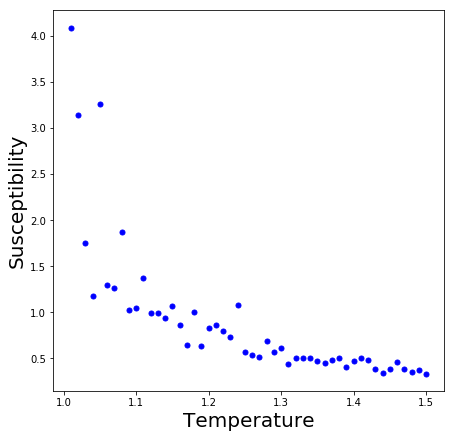

In [107]:
plt.figure(figsize=(7,7)) 
plt.plot(temps[51:], spec_heatv1[51:], 'bo', markersize = 5)
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Susceptibility", fontsize=20)

In [112]:
scipy.optimize.curve_fit(powerpos, temps[51:61], spec_heatv1[51:61], p0 = [1, 1, 0.35], sigma = sh_errors[51:61], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.42027641,  1.00728955, -0.38715084]),
 array([[7.73710617e-02, 1.31937922e-03, 6.18896421e-02],
        [1.31937922e-03, 2.94650395e-05, 1.12867698e-03],
        [6.18896421e-02, 1.12867698e-03, 5.09276116e-02]]))

In [116]:
scipy.optimize.curve_fit(powerpos, temps[51:60], spec_heatv1[51:60], p0 = [1, 1, 0.35], sigma = sh_errors[51:60], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


(array([ 0.43062945,  1.0074184 , -0.37983735]),
 array([[1.29954710e-01, 1.99675542e-03, 9.84634266e-02],
        [1.99675542e-03, 3.85465896e-05, 1.60013334e-03],
        [9.84634266e-02, 1.60013334e-03, 7.63561497e-02]]))